<h3 
    align="center" 
    style="font-size: 80px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:10px;background-color: darkblue">
    <span style="color: white;"> SALES PREDICTION </span>
</h3>

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Importing Libraries  </span>
</h3>

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, accuracy_score, classification_report, mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Exploratory Data Analysis (EDA)  </span>
</h3>

In [4]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


F:\program files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

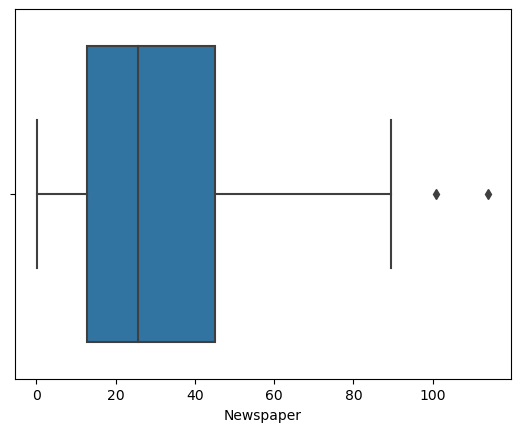

In [8]:
sns.boxplot(data['Newspaper'])

F:\program files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

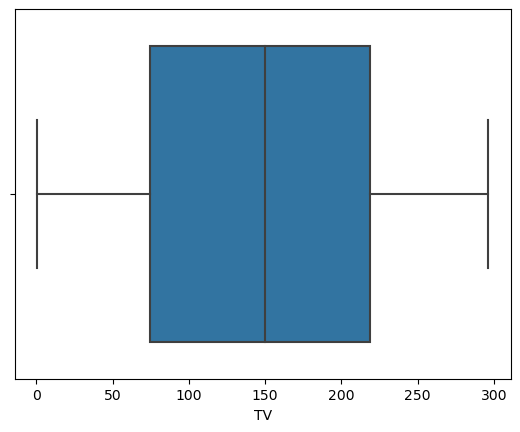

In [9]:
sns.boxplot(data['TV'])

F:\program files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Radio'>

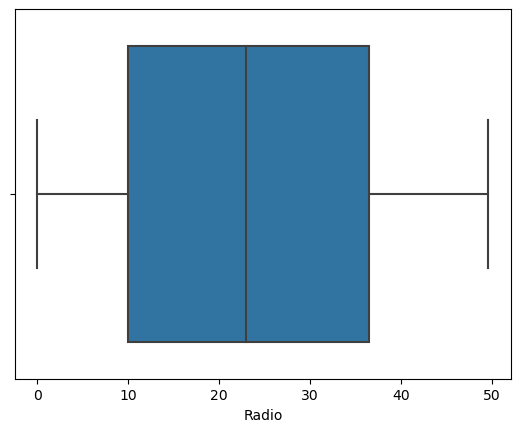

In [10]:
sns.boxplot(data['Radio'])

In [11]:
data = data[data['Newspaper'] <= 90 ]

In [12]:
print('max: \n',data[data['Newspaper'] == data['Newspaper'].max()])
print('\nmin: \n',data[data['Newspaper'] == data['Newspaper'].min()])

max: 
       TV  Radio  Newspaper  Sales
75  16.9   43.7       89.4    8.7

min: 
        TV  Radio  Newspaper  Sales
33  265.6   20.0        0.3   17.4


In [13]:
data[data['Radio'] == data['Radio'].max()]

,TV,Radio,Newspaper,Sales
58,210.8,49.6,37.7,23.8


In [14]:
data[data['TV'] == data['TV'].max()]

,TV,Radio,Newspaper,Sales
42,293.6,27.7,1.8,20.7


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Data Visualization </span>
</h3>

<AxesSubplot:xlabel='TV', ylabel='Radio'>

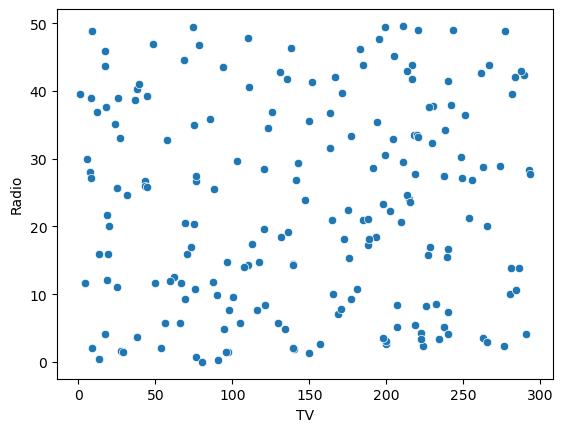

In [17]:
sns.scatterplot(data = data, x = 'TV', y = 'Radio')

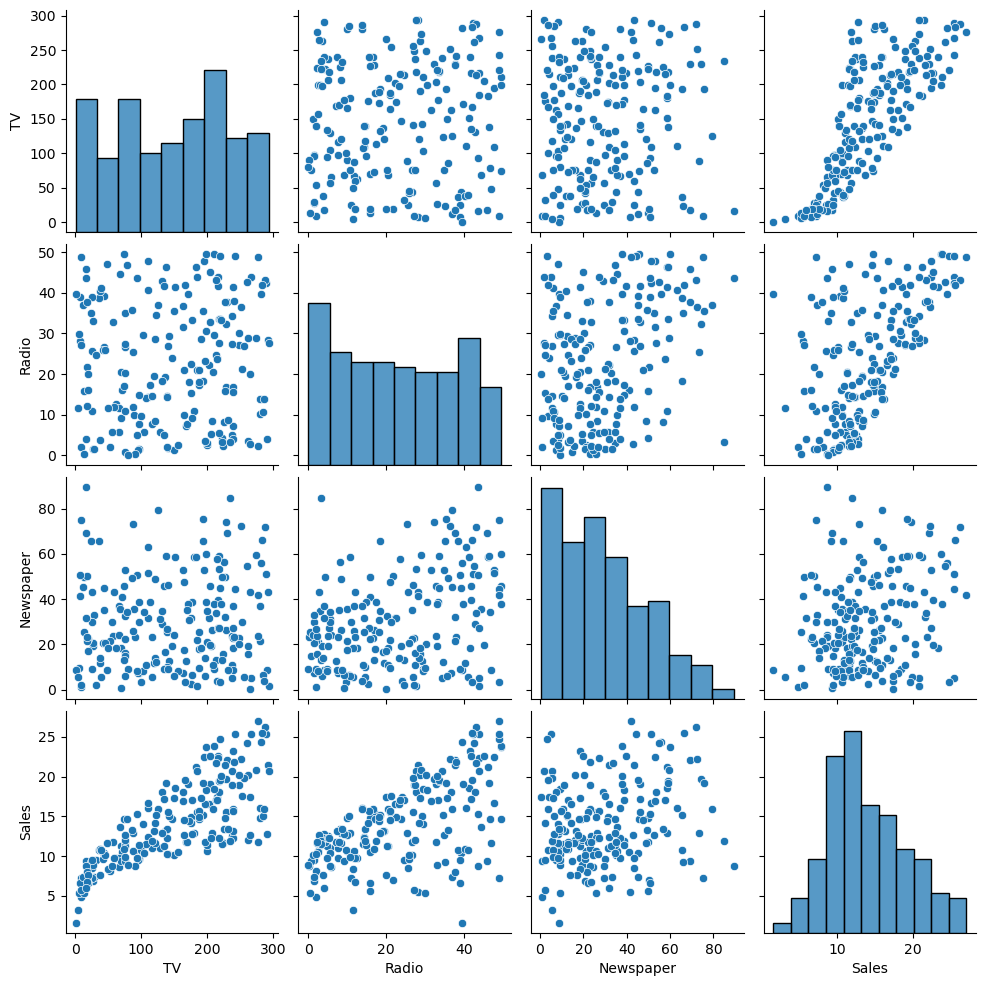

In [18]:
sns.pairplot(data)

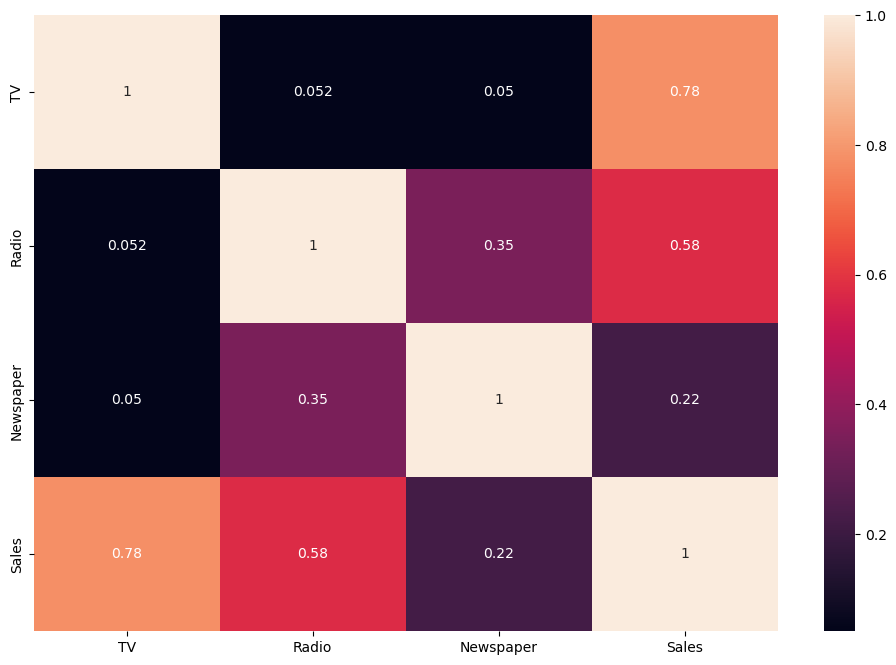

In [20]:
plt.figure(figsize = (12,8))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot = True)
plt.show()

In [22]:
x =data.drop(columns = 'Sales', axis = 1)
y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 1, test_size = 0.2)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Model Selection </span>
</h3>

## Linear Regression 

In [32]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

r2_score(y_test, y_pred_lr)

0.891219907737298

In [33]:
# ridge model

ri_model = Ridge()

ri_model.fit(x_train, y_train)
y_pred_ri = ri_model.predict(x_test)

r2_score(y_test, y_pred_ri)

0.8912186116005141

In [34]:
# Lasso
ls_model = Lasso()

ls_model.fit(x_train, y_train)
y_pred_ls = ls_model.predict(x_test)

r2_score(y_test, y_pred_ls)

0.8906581958177723

In [36]:
# Random forest regressor
rfr_model = RandomForestRegressor()

rfr_model.fit(x_train, y_train)
y_pred_rfr = rfr_model.predict(x_test)

r2_score(y_test, y_pred_rfr)

0.9838178580501624

In [37]:
# Suport Vector Machine
svr_model = SVR()

svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)

r2_score(y_test, y_pred_svr)

0.8316305014477002

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">Model Performance</span>
</h3>

# Linear Regression 

In [40]:
print("R2 Score : ",r2_score(y_test, y_pred_lr))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred_lr))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred_lr))

R2 Score :  0.891219907737298
Mean Squared Error :  2.8260632849480922
Mean Absolute Error :  1.2322272995686283


# Ridge 

In [41]:
print("R2 Score : ",r2_score(y_test, y_pred_ri))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred_ri))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred_ri))

R2 Score :  0.8912186116005141
Mean Squared Error :  2.826096958063284
Mean Absolute Error :  1.2322346771081354


# Lasso 

In [42]:
print("R2 Score : ",r2_score(y_test, y_pred_ls))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred_ls))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred_ls))

R2 Score :  0.8906581958177723
Mean Squared Error :  2.8406563359326027
Mean Absolute Error :  1.2396938201206666



# Random Forest Regressor

In [43]:
print("R2 Score : ",r2_score(y_test, y_pred_rfr))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred_rfr))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred_rfr))

R2 Score :  0.9838178580501624
Mean Squared Error :  0.42040557499999964
Mean Absolute Error :  0.5385250000000006


# Support Vector Machine 

In [44]:
print("R2 Score : ",r2_score(y_test, y_pred_svr))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred_svr))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred_svr))

R2 Score :  0.8316305014477002
Mean Squared Error :  4.3741722245893255
Mean Absolute Error :  1.5055282886522576


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:darkblue">
    <span style="color: white;">CONCLUSION </span>
</h3>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h1><strong>Sales Prediction</strong></h1>


- <p>In this internship task, I focused on sales prediction using various regression models. After importing the necessary libraries and loading the 'Advertising' dataset, I conducted an exploratory data analysis (EDA) to understand the data, identifying strong correlations between 'TV' and 'Radio' advertising budgets and 'Sales'. I also removed outliers from the 'Newspaper' column to enhance model robustness.</p>
    

- <p>For model selection, I considered Linear Regression, Ridge, Lasso, Random Forest Regressor, and Support Vector Machine (SVM). Among these, the Random Forest Regressor outperformed the rest, achieving an impressive R2 score of approximately 0.984, demonstrating its accuracy in sales prediction. Linear Regression, Ridge, and Lasso also performed well with R2 scores around 0.891. Support Vector Machine (SVM) exhibited slightly lower performance with an R2 score of 0.832.</p>

    
    
- <p>In conclusion, the Random Forest Regressor stands out as the most suitable model for sales prediction, providing the highest level of accuracy. When predicting sales based on advertising budgets, it is the preferred choice. However, it's important to consider additional factors and domain-specific knowledge when implementing the model in real-world applications</p>

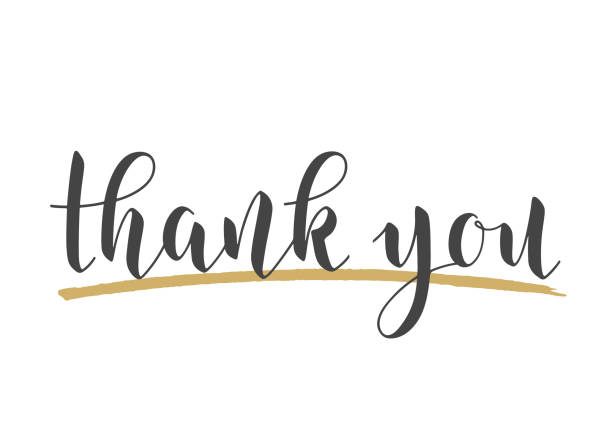